In [1]:
! pip install pennylane
! pip install pennylane
! pip install qiskit torch numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664

In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pennylane as qml

import torch
import torch.nn as nn
from torch.autograd import Function
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp

import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pennylane as qml

import torch
import torch.nn as nn
import torch.optim as optim
import pennylane as qml
import numpy as np

from torch.utils.data import TensorDataset, DataLoader
import datetime

import torch
import torch.nn as nn
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [2]:
x_train_dataset_name = "wdbc_train"
x_val_dataset_name = "wdbc_val"
x_test_dataset_name = "wdbc_test"

model_name = "wdbc_model"

# DataSet Creation

Execute the below sections only if we want to create a fresh dataset. We already have datsets snaphots with us so we can directly use that.

In [3]:
! wget https://raw.githubusercontent.com/Meta-user-byte/FLIQ/refs/heads/main/Datasets/breast%2Bcancer%2Bwisconsin%2Bdiagnostic/wdbc.data

--2025-05-17 21:17:25--  https://raw.githubusercontent.com/Meta-user-byte/FLIQ/refs/heads/main/Datasets/breast%2Bcancer%2Bwisconsin%2Bdiagnostic/wdbc.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [text/plain]
Saving to: ‘wdbc.data.4’

wdbc.data.4         100%[===================>] 121.19K  --.-KB/s    in 0.02s   

2025-05-17 21:17:25 (5.61 MB/s) - ‘wdbc.data.4’ saved [124103/124103]



In [4]:

def data_reader(filepath):
    wdbc_columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    # Detect delimiter
    with open(filepath, 'r', encoding='utf-8') as f:
        sample = f.read(2048)
        sniffer = csv.Sniffer()
        dialect = sniffer.sniff(sample)
        delimiter = dialect.delimiter
        df = pd.read_csv(filepath, delimiter=",", names=wdbc_columns)
        return df


def load_wdbc():
  df = data_reader("wdbc.data")
  df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
  train_full = df.sample(frac=0.7)
  test_full = df[~df.index.isin(train_full.index)]
  X_train_full = train_full.drop(columns=['diagnosis']).values.astype(np.float32)
  y_train_full = train_full['diagnosis'].values.astype(np.float32).reshape(-1, 1)
  X_test_full = test_full.drop(columns=['diagnosis']).values.astype(np.float32)
  y_test_full = test_full['diagnosis'].values.astype(np.float32).reshape(-1, 1)
  return X_train_full, y_train_full, X_test_full, y_test_full

#Drop the ID column
seed = 42
X_train_full, y_train_full, X_test_full, y_test = load_wdbc()


# Standardize features (fit on training data, apply to train/val/test)
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Split training data into train and validation subsets
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(
    X_train_full_scaled, y_train_full, test_size=0.15, stratify=y_train_full, random_state=seed
)



#Convert to torch tensors
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.float32)

X_val = torch.tensor(X_val_scaled, dtype=torch.float32)
Y_val = torch.tensor(y_val, dtype=torch.float32)

X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.float32)


# Data Loading

Load snapshot data for training, validation and testing

In [14]:
X_train = torch.load(f"{x_train_dataset_name}.pt")
Y_train = torch.load(f"{x_train_dataset_name}_label.pt")

X_val = torch.load(f"{x_val_dataset_name}.pt")
Y_val = torch.load(f"{x_val_dataset_name}_label.pt")

X_test = torch.load(f"{x_test_dataset_name}.pt")
Y_test = torch.load(f"{x_test_dataset_name}_label.pt")

# Model Creation

Below we will design the model.

In [5]:
def get_pos_weight(labels):
    """
    Calculates the positive class weight based on the distribution of labels.

    Args:
        labels (torch.Tensor): A 1D tensor of labels (0 and 1).

    Returns:
        torch.Tensor: A tensor containing the positive class weight.
    """
    positive_count = torch.sum(labels)
    negative_count = len(labels) - positive_count
    if positive_count > 0:
        pos_weight = negative_count / positive_count
    else:
        pos_weight = torch.tensor(1.0)  # Avoid division by zero
    return pos_weight


In [6]:
# 1. Classical Feature Processing Network
class ClassicalFeatureExtractor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.LeakyReLU(0.01) #nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 2. Quantum Feature Map (Variational Quantum Circuit)
n_qubits = 10  # Reduced number of features after classical processing
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_feature_map(inputs, weights, random_weights):
    # Angle embedding of the classical features
    qml.AngleEmbedding(inputs, wires=range(n_qubits))


    qml.templates.RandomLayers(random_weights, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    return qml.expval(qml.PauliZ(0))

# 3. Hybrid Model
class HybridModel(nn.Module):
    def __init__(self, input_size, classical_hidden, quantum_out_size, quantum_weights_shape):
        super().__init__()
        self.classical_extractor = ClassicalFeatureExtractor(input_size, classical_hidden, quantum_out_size)
        self.quantum_weights = nn.Parameter(torch.randn(strongly_entangling_shape))
        self.quantum_random_weights = nn.Parameter(torch.randn(random_shape))
        self.classical_classifier = nn.Linear(1, 1).float() # Binary classification output (single neuron)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Classical feature extraction
        processed_features = self.classical_extractor(x)

        # Quantum feature map
        quantum_output = torch.stack([quantum_feature_map(feature, self.quantum_weights, self.quantum_random_weights) for feature in processed_features])

        # Classical classification layer
        output = self.classical_classifier(quantum_output.unsqueeze(1).float())
        return output



In [7]:

input_size = len(X_train[0,:])
classical_hidden = 20
quantum_out_size = n_qubits
layers = 3
quantum_weights_shape = (layers, n_qubits) # Example: 2 layers of RY rotations
strongly_entangling_shape = qml.StronglyEntanglingLayers.shape(layers, n_qubits)
random_shape = qml.RandomLayers.shape(layers, n_qubits)
model = HybridModel(input_size, classical_hidden, quantum_out_size, strongly_entangling_shape)

# optimizer = optim.Adam(model.parameters(), lr=0.1)

criterion = nn.BCEWithLogitsLoss(pos_weight=get_pos_weight(Y_train))


# Training

Run section to train the model

In [8]:
# 4) Training loop with gradient clipping and scheduler
num_epochs = 50
optimizer = torch.optim.Adam(
    model.parameters(), lr=1e-3, weight_decay=1e-4
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=5, min_lr=1e-5, verbose=True
)
# 3) DataLoader for batching

train_ds = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
for epoch in range(1, num_epochs+1):
    model.train()
    total_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        logits = model(batch_X)
        #print(batch_y, logits)
        loss   = criterion(logits, batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item() * batch_X.shape[0]
    avg_loss = total_loss / len(train_loader.dataset)

    # Validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val)
        val_loss   = criterion(val_logits, Y_val).item()
        val_preds  = (torch.sigmoid(val_logits) >= 0.05).float()
        val_acc    = (val_preds == Y_val).float().mean().item()

    print(f"Epoch {epoch:2d} | Train loss {avg_loss:.4f} | Val loss {val_loss:.4f} | Val acc {val_acc:.3f}")
    scheduler.step(val_loss)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch  1 | Train loss 0.8925 | Val loss 0.8902 | Val acc 0.383
Epoch  2 | Train loss 0.8826 | Val loss 0.8825 | Val acc 0.383
Epoch  3 | Train loss 0.8726 | Val loss 0.8730 | Val acc 0.383
Epoch  4 | Train loss 0.8606 | Val loss 0.8624 | Val acc 0.383
Epoch  5 | Train loss 0.8485 | Val loss 0.8507 | Val acc 0.383
Epoch  6 | Train loss 0.8359 | Val loss 0.8395 | Val acc 0.383
Epoch  7 | Train loss 0.8234 | Val loss 0.8277 | Val acc 0.383
Epoch  8 | Train loss 0.8102 | Val loss 0.8144 | Val acc 0.383
Epoch  9 | Train loss 0.7964 | Val loss 0.8017 | Val acc 0.383
Epoch 10 | Train loss 0.7825 | Val loss 0.7886 | Val acc 0.383
Epoch 11 | Train loss 0.7688 | Val loss 0.7756 | Val acc 0.383
Epoch 12 | Train loss 0.7549 | Val loss 0.7634 | Val acc 0.383
Epoch 13 | Train loss 0.7408 | Val loss 0.7510 | Val acc 0.383
Epoch 14 | Train loss 0.7262 | Val loss 0.7366 | Val acc 0.383
Epoch 15 | Train loss 0.7108 | Val loss 0.7213 | Val acc 0.383
Epoch 16 | Train loss 0.6938 | Val loss 0.7078 | Val ac

# Load Saved Model

If we want to load the pre trained model, we can execute this section.

In [30]:
model.load_state_dict(torch.load(f"{model_name}.pt"))

<All keys matched successfully>

# [ Optional ] Save Model and dataset

In [39]:

curr_time = str(datetime.datetime.now())
# Save the model's state dictionary
model_name = f'wdbc_model_{curr_time}.pt'
torch.save(model.state_dict(), model_name)
print(f"Model saved to {model_name}")

# Save the tensors
torch.save(X_train, f'wdbc_train_{curr_time}.pt')
torch.save(Y_train, f'wdbc_train_label_{curr_time}.pt')

torch.save(X_val, f'wdbc_val_{curr_time}.pt')
torch.save(Y_val, f'wdbc_val_label_{curr_time}.pt')

torch.save(X_test, f'wdbc_test_{curr_time}.pt')
torch.save(Y_test, f'wdbc_test_label{curr_time}.pt')


Model saved to wdbc_model_2025-05-17 21:00:28.265181.pt


# Evaluation

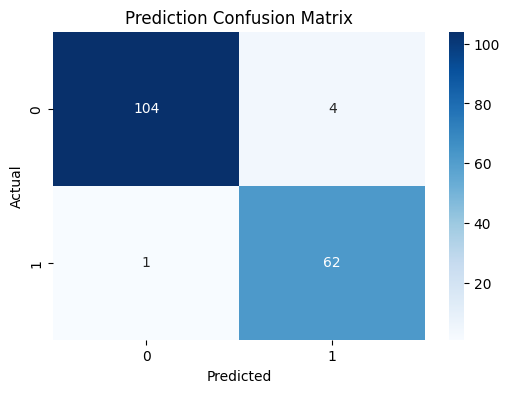

Test Loss: 0.4349
Accuracy: 0.9708
Precision: 0.9394
Recall: 0.9841
F1 Score: 0.9612


In [40]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

loss_function = criterion

def evaluate(model, test_loader, loss_function):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)  # Get the raw output (logits)
            loss = loss_function(outputs, labels.float())  # Calculate the loss
            total_loss += loss.item()

            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predictions = (probabilities >= 0.5).long()  # Convert probabilities to predictions
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            cm = confusion_matrix(labels, predictions)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title("Prediction Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()

    avg_loss = total_loss / len(test_loader)
    return avg_loss, all_predictions, all_labels


avg_test_loss, test_predictions, test_labels = evaluate(model, [[X_test, Y_test]], loss_function)

# Now we can use test_predictions and test_labels to calculate metrics:

accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [42]:
def calculate_metrics(y_true, y_pred):
    """
    Calculates precision, recall, F1-score, and accuracy.

    Args:
        y_true (list or numpy.ndarray): True labels (0 and 1).
        y_pred (list or numpy.ndarray): Predicted labels (0 and 1).

    Returns:
        dict: A dictionary containing the calculated metrics.
    """
    # Ensure inputs are numpy arrays for easier calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 1. Confusion Matrix Components
    #    These are the raw counts we need.
    true_positives  = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    true_negatives  = np.sum((y_true == 0) & (y_pred == 0))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    # 2. Precision
    #    - What proportion of positive predictions were *actually* positive?
    #    - High precision means low false positive rate (Type I error).
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0

    # 3. Recall (Sensitivity, True Positive Rate)
    #    - What proportion of *actual* positives did we correctly predict?
    #    - High recall means low false negative rate (Type II error).
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0

    # 4. F1-Score
    #    - Harmonic mean of precision and recall.
    #    - Balances precision and recall in a single metric.
    #    - Useful when you want a trade-off between false positives and false negatives.
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # 5. Accuracy
    #    - Overall proportion of correct predictions.
    accuracy = (true_positives + true_negatives) / len(y_true) if len(y_true) > 0 else 0.0

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'accuracy': accuracy,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'true_negatives': true_negatives,
        'false_negatives': false_negatives
    }

def print_metrics(metrics, problem_name=""):
    """Prints the metrics in a user-friendly format.

       Args:
          metrics (dict): A dictionary of metrics
          problem_name (str): Optional name of the problem.
    """
    if (problem_name != ""):
        print(f"Results for {problem_name}:")
    print(f"  Precision:     {metrics['precision']:.4f}")
    print(f"  Recall:        {metrics['recall']:.4f}")
    print(f"  F1 Score:      {metrics['f1_score']:.4f}")
    print(f"  Accuracy:      {metrics['accuracy']:.4f}")
    print(f"  True Positives:  {metrics['true_positives']:d}")
    print(f"  False Positives: {metrics['false_positives']:d}")
    print(f"  True Negatives:  {metrics['true_negatives']:d}")
    print(f"  False Negatives: {metrics['false_negatives']:d}")



metrics = calculate_metrics(Y_test, test_predictions)

# Print the metrics
print_metrics(metrics, "wdbc classification")

# Example of how the metrics relate to balancing errors:
print("\nBalancing False Positives and False Negatives:")
print("  - Precision focuses on minimizing False Positives (Type I error).")
print("  - Recall focuses on minimizing False Negatives (Type II error).")
print("  - F1 Score balances both Precision and Recall.")
print("  - Accuracy measures overall correctness but doesn't differentiate between")
print("    types of errors.")

Results for Example Problem:
  Precision:     0.9394
  Recall:        0.9841
  F1 Score:      0.9612
  Accuracy:      0.9708
  True Positives:  62
  False Positives: 4
  True Negatives:  104
  False Negatives: 1

Balancing False Positives and False Negatives:
  - Precision focuses on minimizing False Positives (Type I error).
  - Recall focuses on minimizing False Negatives (Type II error).
  - F1 Score balances both Precision and Recall.
  - Accuracy measures overall correctness but doesn't differentiate between
    types of errors.
